# Examining the Results of Classical and Relativistic Motion Modeling


# What is the purpose of this project?
The purpose of this project is to examine the difference of Classical and Relativitic Motion ODEs. We will do this by applying a constant force on two identical particles using the two different methods and comparing/contrasting the results.

Let's make a plan to implement.

## Steps:

1.) Create two particles of identical mass, starting position, and velocity(0)

2.) Apply the classical and relativistic models to each particle respectivelly 

3.) Plot the differences of the velocities of the two particles as they approach and/or exceed the speed of light

### Note:
For simplicity imagine the particle resting on the x axis with no force in the y direction and therefore no y velocity.
This will have no effect on our calculation of speed but it will make graphs and print-outs much easier to read.

### Questions to anwser
-Does drastically changing the mass of the particle change the results?

-Is there any force that can cause our relativitic model to break?

-At approximately what speed does the classical and relativistic models start to differ?

#### Here is a rough visualization
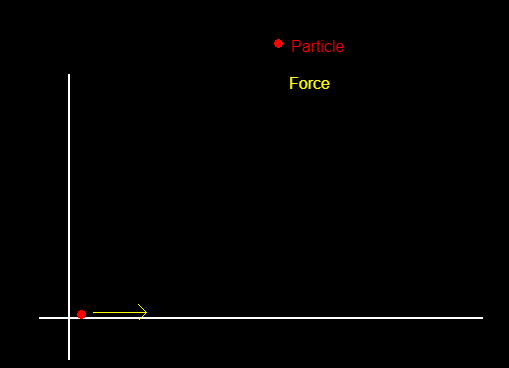

## Let's create the particles and define constants
## We will also create the particles and define functions to manipulate them

In [16]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt
c = 3e8 #speed of light in meters per second
#forces to play around with
force1 = 1000
force2 = 3.45e7  #force of gravity by sun on .01 kg located equidistance of mars
Nsteps = 10000 #number of time steps

In [17]:
class particle:
    
    def __init__(self, mass,v,x):
        self.m = mass  #initialize the particles mass
        self.v = np.zeros(Nsteps) #an array of size 1000 to store velocity values 
        self.p = np.zeros(Nsteps)
        self.x = 0  #x position at beginning
        
    def output(self):
        fig = plt.figure()
        plt.title("Velocity of particle vs time")
        plt.plot(tarray,self.v, 'b-')
#        plt.plot(tarray,p2.v,'r-')
        plt.xlabel('t (?)')
        plt.ylabel('Velocity')
        plt.show()
        

p1 = particle(.01,1,0) #the second 1 is redundant

##used for testing 

# print(p1.m)
# print(p1.v[0])
tarray = np.zeros(Nsteps)
p2 = particle(2,1,0)
# p1.output(p2)
# p1.v[1] = 10
# p1.calcp(1)
# print(p1.p)

In [18]:
# do p = (1/sqrt(1-v^2/c^2)) * m * v
def relativistic(particle,i):
    v = particle.p[i]/(particle.m**2+(particle.p[i]**2/c**2))**(1/2)
    particle.v[i] = v

def classical(particle,i):
    v = particle.p[i]/particle.m
    particle.v[i] = v

## Now we have our particles and functions defined lets apply some forces to the particles and use the ODE's to predict their speeds'

Based off of my current understanding I hypothesise the particles will deviate from each other in terms of speed when they become closer to the speed of light.

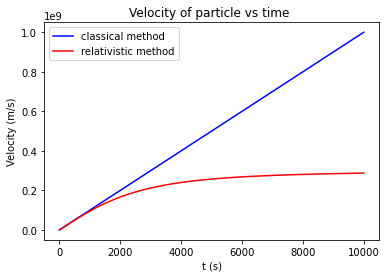

In [28]:
p1 = particle(.01,1,0)
p2 = particle(.01,1,0)
#time
t = 0 #independent time variable
h = 1


for n in range(0,Nsteps-1):
    
    t = t + h
    p1.p = p1.p+force1
    p2.p = p2.p+force1
    classical(p1,t)
    relativistic(p2,t)
    tarray[n+1] = t
    

fig = plt.figure()
plt.title("Velocity of particle vs time ")
plt.plot(tarray,p1.v,'b-', label = 'classical method')
plt.plot(tarray,p2.v,'r-',label = 'relativistic method')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

### What can we draw from this?
From above we see that given the same initial values and the same constant force we get very different results.

It appears they begin to significantly deviate around .2e8.

The classical method returns a velocity that scaled linearly with time whereas the relativistic method apporaches 3e8 but never achieves that speed.
This can become a bit clearer when graphed seperately.

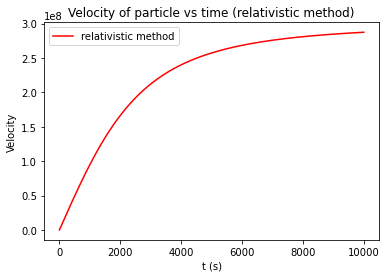

Speed of particle: 287345512.6425819 m/s


In [15]:
p2 = particle(.01,1,0)
#time
t = 0 #independent time variable
h = 1

for n in range(0,Nsteps-1):
    
    t = t + h
    p2.p = p2.p+force1
    relativistic(p2,t)
    tarray[n+1] = t
    
fig = plt.figure()
plt.title("Velocity of particle vs time (relativistic method)")
plt.plot(tarray,p2.v,'r-',label = 'relativistic method')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('Velocity')
plt.show()

print("Speed of particle:",p2.v[Nsteps-1],"m/s")

We see the  particle rapidly approaches the speed of light and if we look at the printout it gets fairly close.

But what would happen if we added a very large force to the particle for a very long time? We hypothesize in real life the particle would never reach the speed of light due to it habving mass, but lets see if our simulation is robust enough to accurately model that.

More specifically lets hypothetically let the saturn V rocket produce its maximum thrust on the particle while providing no additional mass. That would mean we would have 34.5 million newtons of force on the particle constantly which should surely break our simulation.

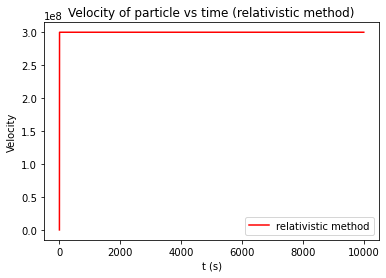

Speed of particle: 299999999.9886556 m/s


In [19]:
p2 = particle(.01,1,0)
#time
t = 0 #independent time variable
h = 1

for n in range(0,Nsteps-1):
    
    t = t + h
    p2.p = p2.p+force2
    relativistic(p2,t)
    tarray[n+1] = t
    
fig = plt.figure()
plt.title("Velocity of particle vs time (relativistic method)")
plt.plot(tarray,p2.v,'r-',label = 'relativistic method')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('Velocity')
plt.show()

print("Speed of particle:",p2.v[Nsteps-1],"m/s")

### Success!
This is exactly what we expected to happen. With such a massive force constantly acting on a small mass, the particle almost instantly accelerated to near speed of light.
With a final particle speed that is %99.99701905 the speed of light we can safely assume our model can accurately calculate relativitic motion.